# VERIFY Phase – Hands-On (Student Version)

In this notebook, you will **verify** that the cleaned dataset (`df_treat`) is structurally sound, operationally realistic, and comparable to a clean reference dataset (`df_clean_reference`).

**Important:** This notebook contains only prompts and TODO-style code. You are expected to complete the analysis yourself.

## 0. Load Treated, Raw, and Reference Data

**What to do**
- Load `df_raw`, `df_treat`, and `df_clean_reference` from CSV.
- Print their shapes to confirm successful loading.

**What to look for**
- Same number of columns across all three.
- Similar number of rows for `df_treat` and `df_clean_reference`.

In [3]:
# TODO: Import pandas and matplotlib, then load the three datasets.

# Hint: use pd.read_csv('df_raw.csv'), etc.

import pandas as pd

import matplotlib.pyplot as plt


# Your code here

df_treat = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_after_treat.csv')

df_raw = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_messy.csv')
df_clean_reference = pd.read_csv('https://raw.githubusercontent.com/saikisri97/17_Hof_Lecture_Code_Pingo/refs/heads/main/Supply_Chain_Analytics/data/Global_Shipments_v3_clean.csv')  # teacher-prepared


print('RAW shape:', df_raw.shape)

print('TREAT shape:', df_treat.shape)

print('REFERENCE shape:', df_clean_reference.shape)

RAW shape: (1000, 17)
TREAT shape: (1000, 18)
REFERENCE shape: (200, 14)


## 1. Structural Checks

**VERIFY Step 1 – Structural Checks**

**What to look for**
- No missing values in KPI-critical fields (`Delivery_Time_hrs`, `Weight_kg`, `On_Time_Flag`, `Weekly_Sales_EUR`).
- Data types are correct (numeric where expected, categorical where expected).
- No logical violations (e.g., negative delivery times, non-positive weights).

**What to do**
- Use a missingness summary (e.g., `missing_report(df_treat)` if available, or `df_treat.isna().sum()`).
- Inspect `df_treat.dtypes`.
- Check for negative or zero values in key columns.

In [ ]:
# TODO: Structural missingness check


# Use df_treat.isna().sum() to inspect missing values.





Unnamed: 0                    0
Shipment_ID                   0
Week                          0
Warehouse_ID                  0
Store_ID                      0
Carrier                       0
Product_Category              0
Weight_kg                     0
Delivery_Time_hrs             0
Fuel_Price_EUR_per_litre      0
Temperature_C                 0
Promo_Flag                    0
On_Time_Flag                  0
Weekly_Sales_EUR              0
Notes                         0
Dispatch_Time               990
Planned_Arrival_Time        990
Actual_Arrival_Time         990
dtype: int64

In [ ]:
# TODO: Data types check

# Inspect the dtypes for df_treat and confirm numerics vs categoricals.





Unnamed: 0                    int64
Shipment_ID                  object
Week                         object
Warehouse_ID                 object
Store_ID                     object
Carrier                      object
Product_Category             object
Weight_kg                   float64
Delivery_Time_hrs           float64
Fuel_Price_EUR_per_litre    float64
Temperature_C               float64
Promo_Flag                    int64
On_Time_Flag                  int64
Weekly_Sales_EUR            float64
Notes                        object
Dispatch_Time                object
Planned_Arrival_Time         object
Actual_Arrival_Time          object
dtype: object

In [ ]:
# TODO: Logical constraint checks

# Example: negative delivery times, zero or negative weights.

# Hint: Use conditions like (df_treat['Delivery_Time_hrs'] < 0).sum()





0

## 2. KPI Execution

**VERIFY Step 2 – KPI Execution**

**What to look for**
- KPI calculations run **without errors**.
- Values are realistic (no extreme or impossible numbers).

**Key KPIs**
- OTIF (On-Time In-Full) → average of `On_Time_Flag`.
- Average Delivery Time → mean of `Delivery_Time_hrs`.
- EUR per kg → mean of `Weekly_Sales_EUR / Weight_kg`.

**What to do**
- Compute these KPIs on `df_treat`.
- Think: do these values make operational sense?

In [ ]:
# TODO: Compute OTIF, Avg Delivery Time, EUR per kg for df_treat.

# Hint: use .mean() and column arithmetic.


otif_treat = 

avg_dt_treat = 

eur_per_kg_treat = 


otif_treat, avg_dt_treat, eur_per_kg_treat

(0.163, 28.3465, 4708.492969091823)

> **Reflection:** Are these KPI values realistic for a global shipment network? If something looks too high/low, which earlier step (SEE or TREAT) might be the cause?

## 4. Distribution Comparison

**VERIFY Step 3 – Distribution Comparison**

**What to look for**
- Does the distribution of `Delivery_Time_hrs` in `df_treat` look similar to `df_clean_reference`?
- Are outliers controlled (no very long tail compared to reference)?

**What to do**
- Plot histograms or boxplots for `Delivery_Time_hrs` for:
  - Raw (`df_raw`)
  - Treated (`df_treat`)
  - Reference (`df_clean_reference`)

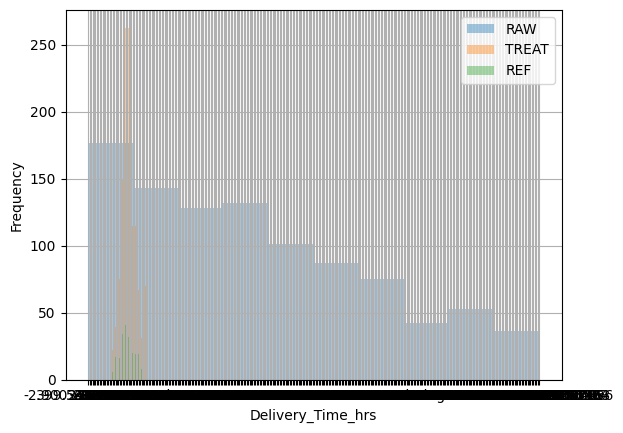

In [ ]:
# TODO: Plot histograms or boxplots for Delivery_Time_hrs

# Compare RAW vs TREAT vs REFERENCE.

# Hint: use .hist() or plt.boxplot() with labels.

df_raw['Delivery_Time_hrs'].hist(alpha=0.4, label='RAW')

df_treat['Delivery_Time_hrs']

df_clean_reference['Delivery_Time_hrs']

plt.legend()

plt.xlabel('Delivery_Time_hrs')

plt.ylabel('Frequency')

plt.show()

## 5. Category-Level Consistency

**VERIFY Step 4 – Category-Level Consistency**

**What to look for**
- Are median weights per `Product_Category` in `df_treat` reasonable?
- Do they broadly align with `df_clean_reference`?

**What to do**
- Group by `Product_Category`.
- Compute median `Weight_kg` (and optionally `Temperature_C`).
- Compare `df_treat` vs `df_clean_reference`.

In [8]:
# TODO: Group by Product_Category and compute medians for Weight_kg.

# Hint: use df_treat.groupby('Product_Category')['Weight_kg'].median()



med_weight_treat = df_treat.groupby('Product_Category')['Weight_kg'].median()

med_weight_ref = df_clean_reference.groupby('Product_Category')['Weight_kg'].median()


med_weight_treat, med_weight_ref

(Product_Category
 Clothing       14.810
 Electronics    15.000
 Frozen         14.875
 Grocery        15.060
 Name: Weight_kg, dtype: float64,
 Product_Category
 Clothing       16.34
 Electronics    15.00
 Frozen         15.13
 Grocery        15.91
 Name: Weight_kg, dtype: float64)

## 6. Final Validation

**VERIFY Step 5 – Final Validation**

**What to look for**
- No remaining structural issues (missingness, dtypes, logical errors).
- KPI values for `df_treat` are reasonable and comparable to `df_clean_reference`.
- Distributions and category-level behaviour look realistic.

**What to do**
- Summarise your findings.
- Decide: is `df_treat` ready for production analytics?
- If not, which SEE or TREAT step needs improvement?

In [9]:
# TODO: Summarise your verification results.

# You can collect key numbers into a dictionary or print them with explanations.



verification_summary = {

    'missing_total': df_treat.isna().sum().sum(),

    'otif_treat': otif_treat,  # replace None with your computed value

    'avg_delivery_time_treat': avg_dt_treat,  # replace with your value

    'eur_per_kg_treat': eur_per_kg_treat,  # replace with your value

    # Add any other indicators you find useful

}


verification_summary

{'missing_total': 2970,
 'otif_treat': 0.163,
 'avg_delivery_time_treat': 28.3465,
 'eur_per_kg_treat': 4708.492969091823}